In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
pi = 3.14
x = np.linspace(-2 * pi, 2 * pi)
y = np.sin(x)

# Make a grid of subplots

In [18]:
def make_axes_grid(ncols=1, nrows=1, w=12, h=4, **subplots_kwargs):
    fig, axes = plt.subplots(figsize=(ncols * w, nrows * h), ncols=ncols, nrows=nrows, **subplots_kwargs)
    return fig, axes

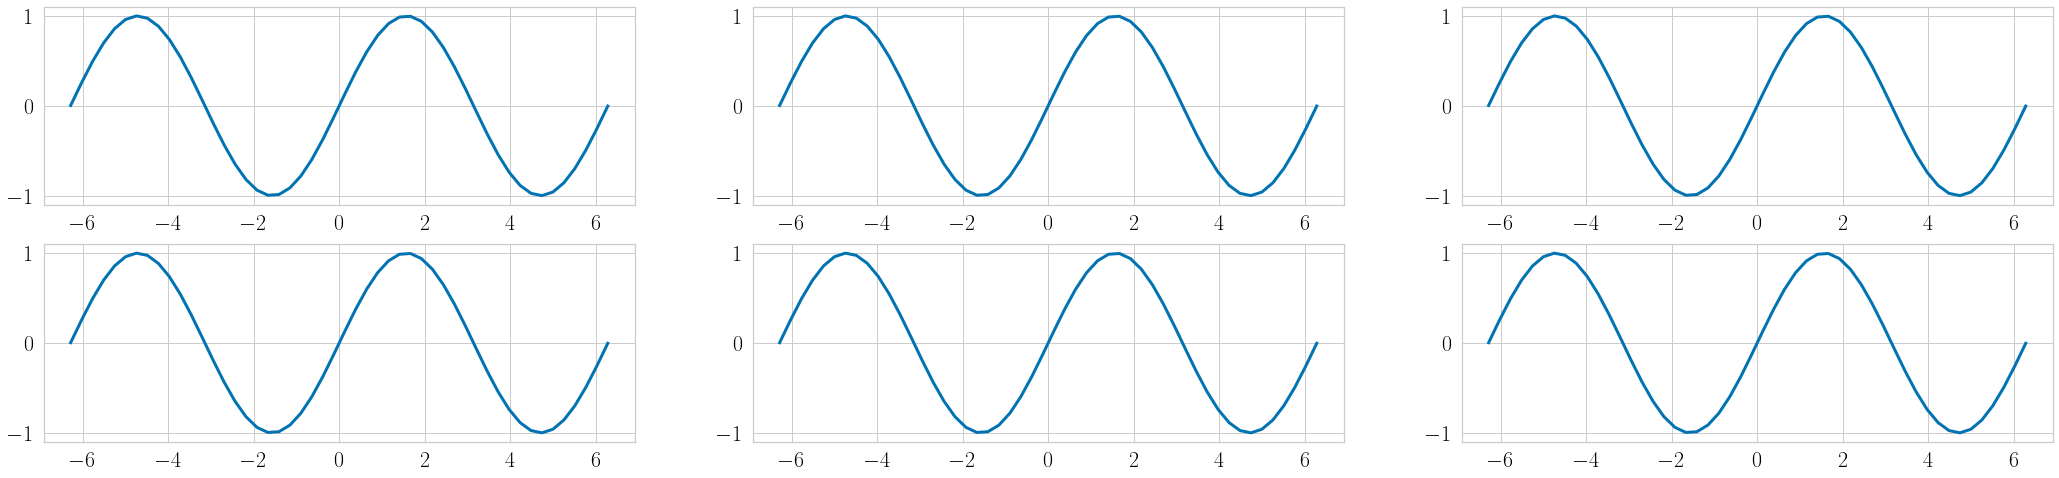

In [19]:
fig, axes = make_axes_grid(ncols=3, nrows=2)
for ax in axes.flat:
    ax.plot(x, y)

# Label each plot

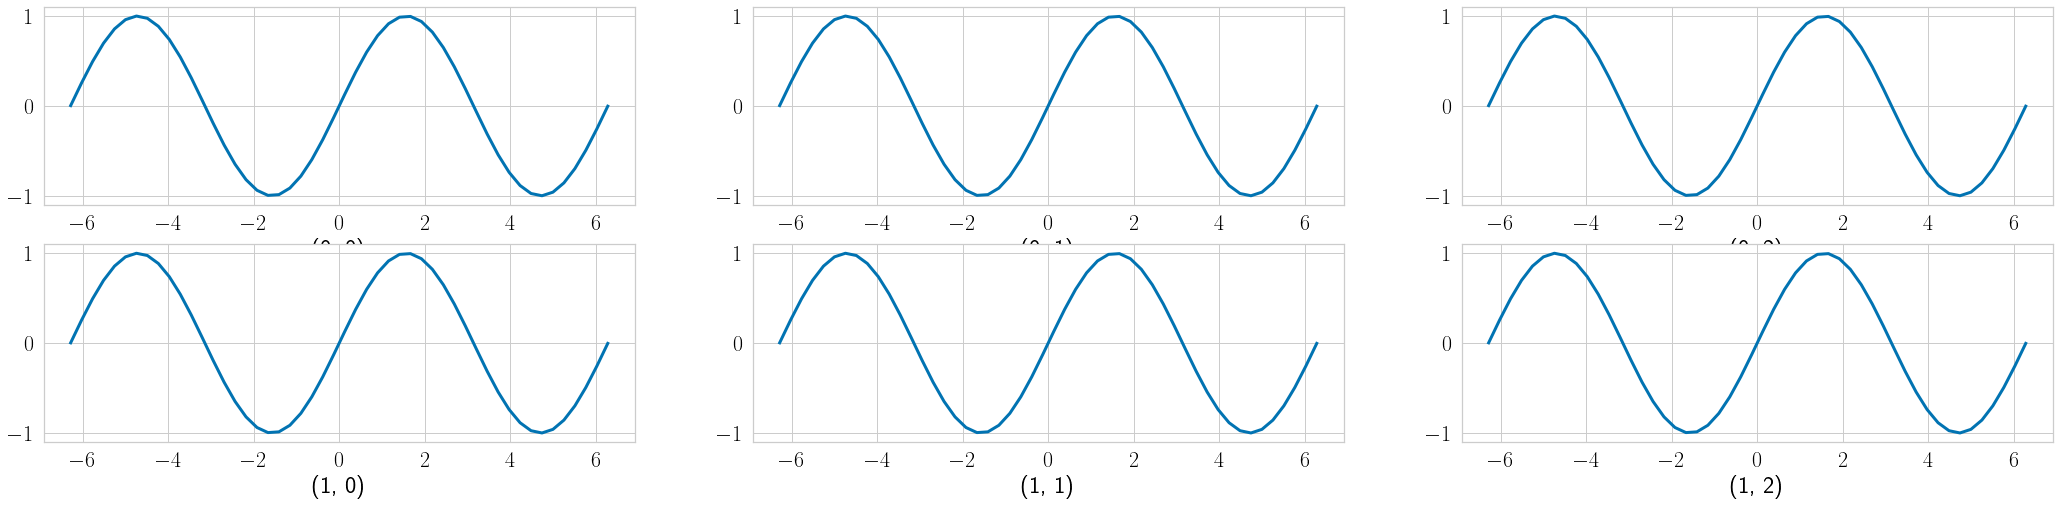

In [21]:
fig, axes = make_axes_grid(ncols=3, nrows=2)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i][j]
        ax.plot(x, y)
        ax.set(xlabel=f"{(i, j)}")

# Fix up the spacing

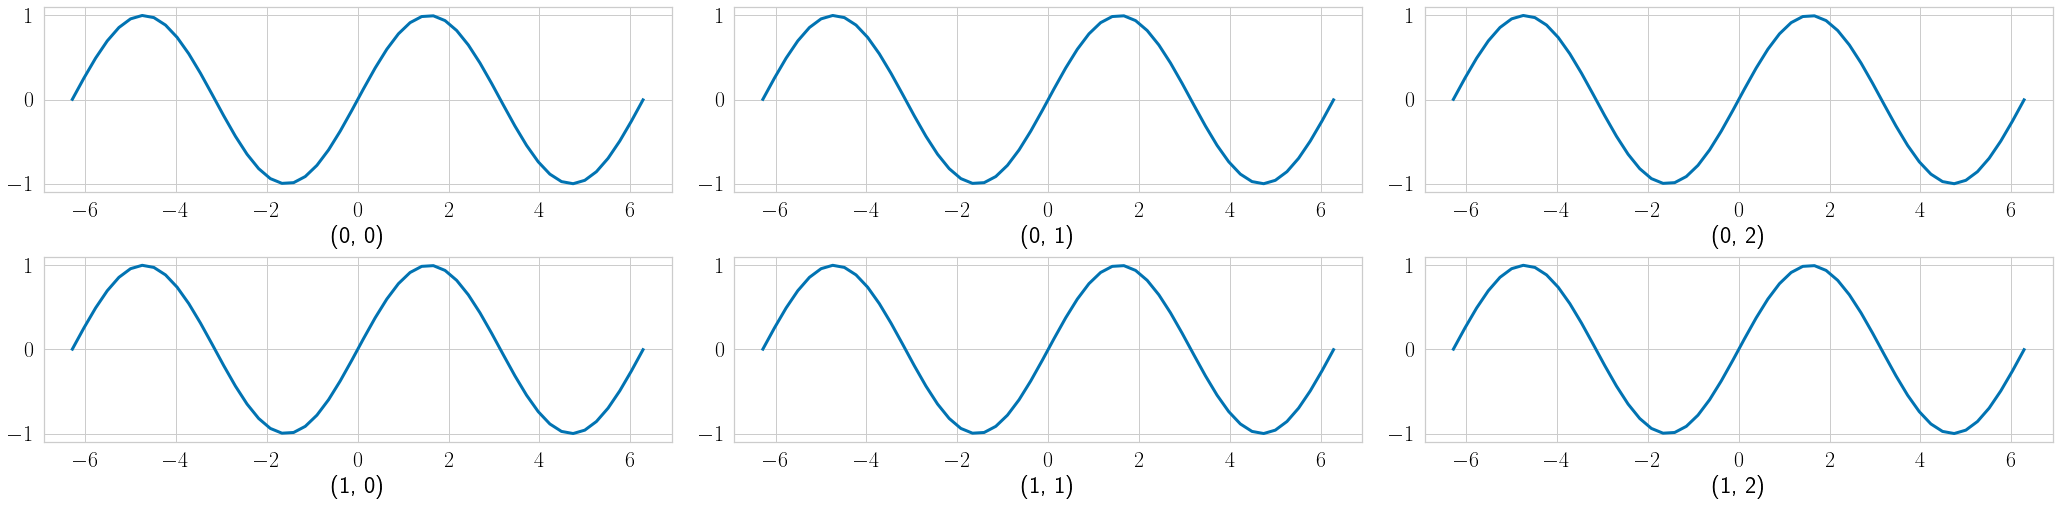

In [37]:
fig, axes = make_axes_grid(ncols=3, nrows=2)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i][j]
        ax.plot(x, y)
        ax.set(xlabel=f"{(i, j)}")
plt.subplots_adjust(hspace=0.35, wspace=0.1)

# Share x axis

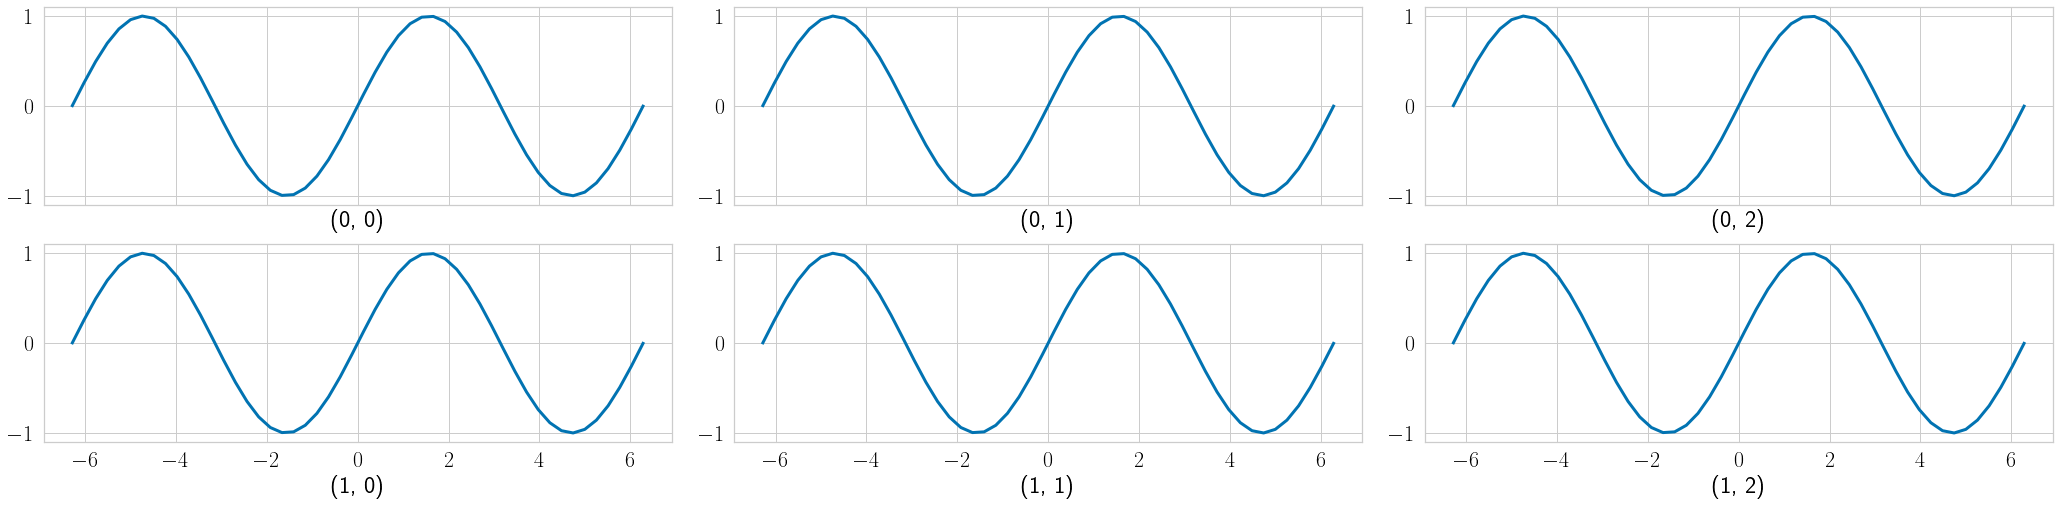

In [39]:
fig, axes = make_axes_grid(ncols=3, nrows=2, sharex=True)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i][j]
        ax.plot(x, y)
        ax.set(xlabel=f"{(i, j)}")
plt.subplots_adjust(hspace=0.2, wspace=0.1)

# Share title

Text(0.5, 0.96, 'Title')

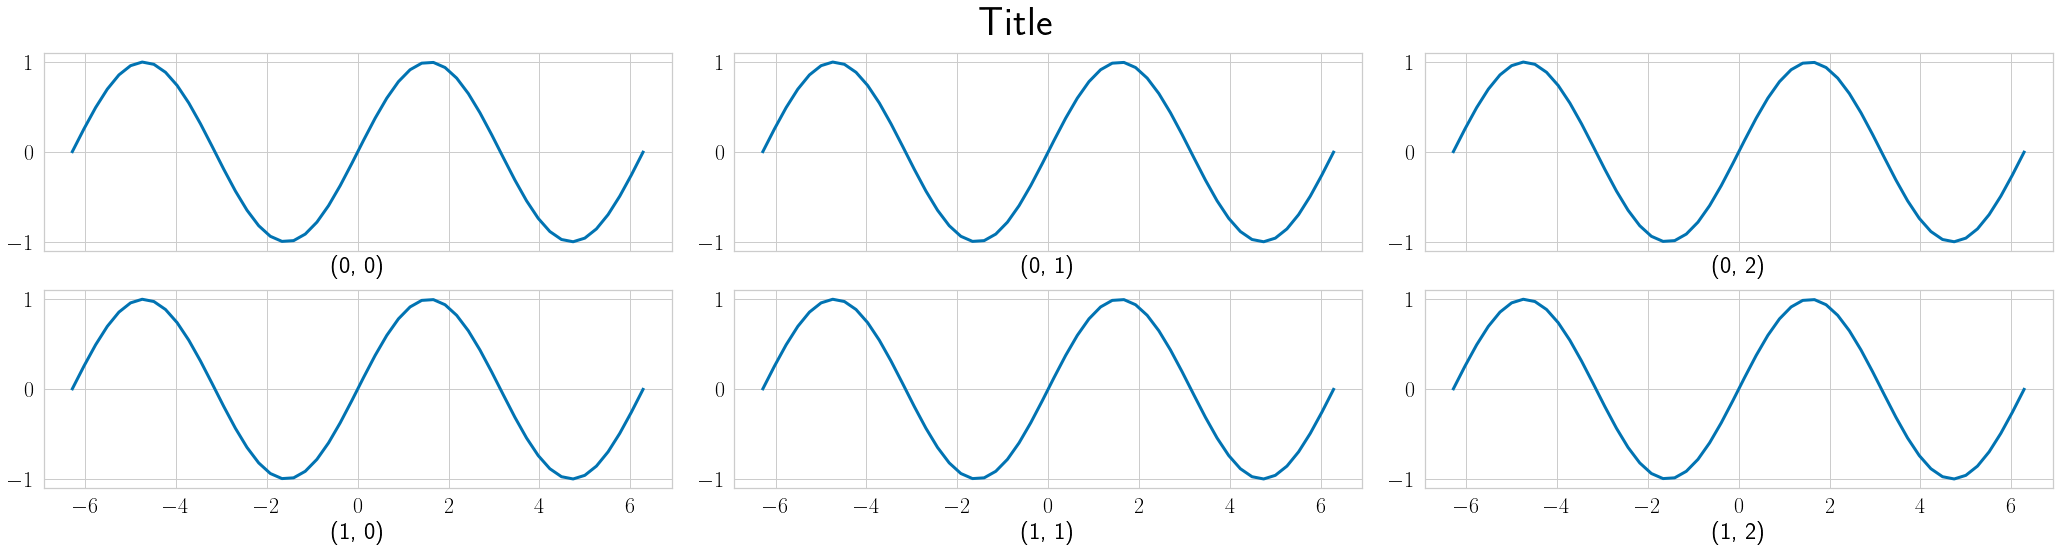

In [69]:
fig, axes = make_axes_grid(ncols=3, nrows=2, sharex=True)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i][j]
        ax.plot(x, y)
        ax.set(xlabel=f"{(i, j)}")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("Title", y=0.96, fontsize=40)

# Label shared y axis

In [59]:
def suplabel(fig, axis, label, labelpad=1, ha="center", va="center", **label_prop):
    """ Add super ylabel or xlabel to the figure, similar to matplotlib.suptitle

    Modified from https://stackoverflow.com/a/29107972/11905157

        axis       - string: "x" or "y"
        label      - string
        label_prop - keyword dictionary for Text
        labelpad   - padding from the axis (default: 5)
        ha         - horizontal alignment (default: "center")
        va         - vertical alignment (default: "center")
    """
    xmin = []
    ymin = []
    for ax in fig.axes:
        xmin.append(ax.get_position().xmin)
        ymin.append(ax.get_position().ymin)
    xmin, ymin = min(xmin), min(ymin)
    dpi = fig.dpi
    if axis.lower() == "y":
        rotation = 90.0
        x = xmin - float(labelpad) / dpi
        y = 0.5
    elif axis.lower() == "x":
        rotation = 0.0
        x = 0.5
        y = ymin - float(labelpad) / dpi
    else:
        raise Exception("Unexpected axis: x or y")
    if label_prop is None:
        label_prop = dict()
    _ = fig.text(
        x,
        y,
        label,
        rotation=rotation,
        transform=fig.transFigure,
        ha=ha,
        va=va,
        **label_prop
    )

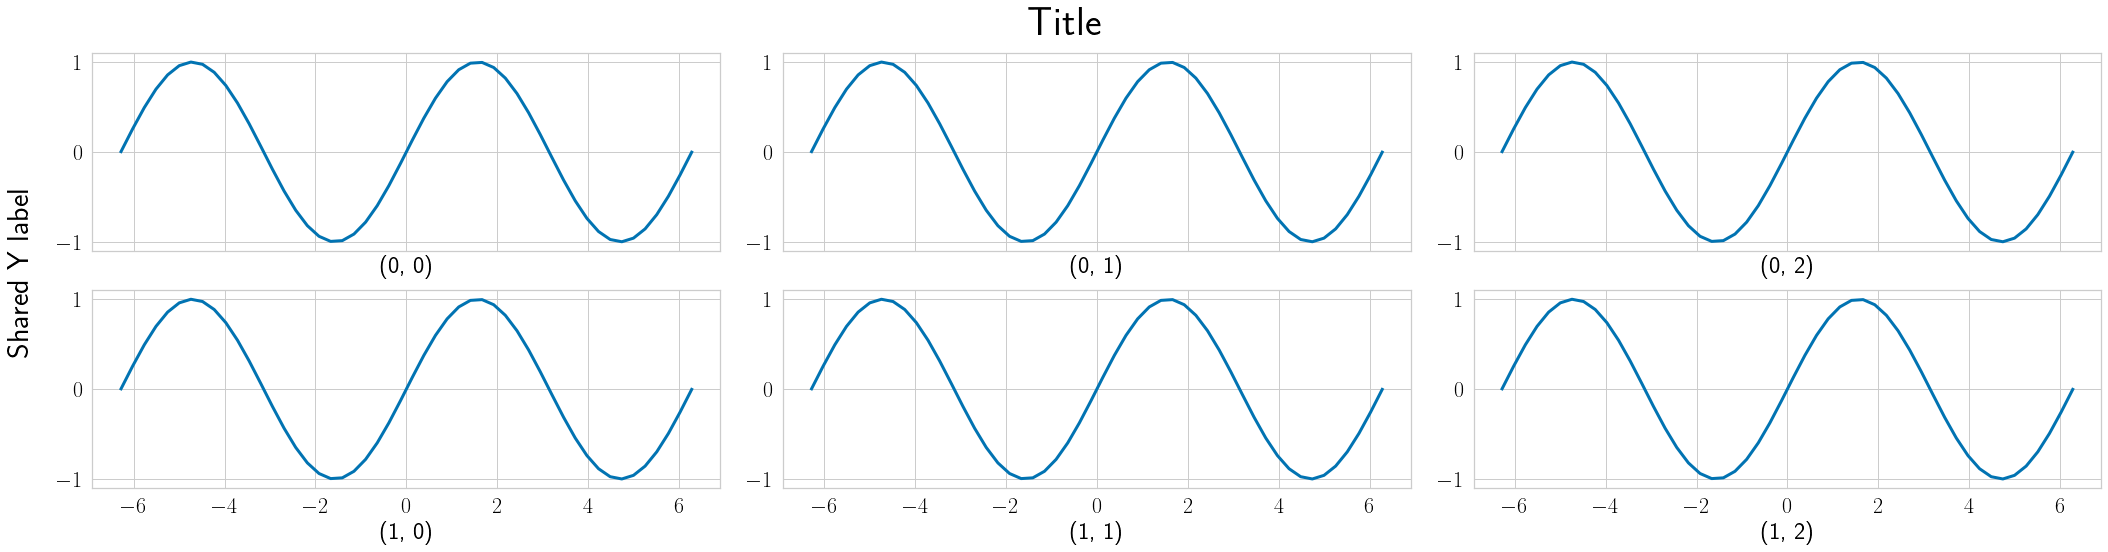

In [70]:
fig, axes = make_axes_grid(ncols=3, nrows=2, sharex=True)
for i in range(axes.shape[0]):
    for j in range(axes.shape[1]):
        ax = axes[i][j]
        ax.plot(x, y)
        ax.set(xlabel=f"{(i, j)}")
plt.subplots_adjust(hspace=0.2, wspace=0.1)
fig.suptitle("Title", y=0.96, fontsize=40)
suplabel(fig, "y", "Shared Y label", labelpad=2, fontsize=30)